In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (3, 2)
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.style.use('default')
from numpy import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


24 24


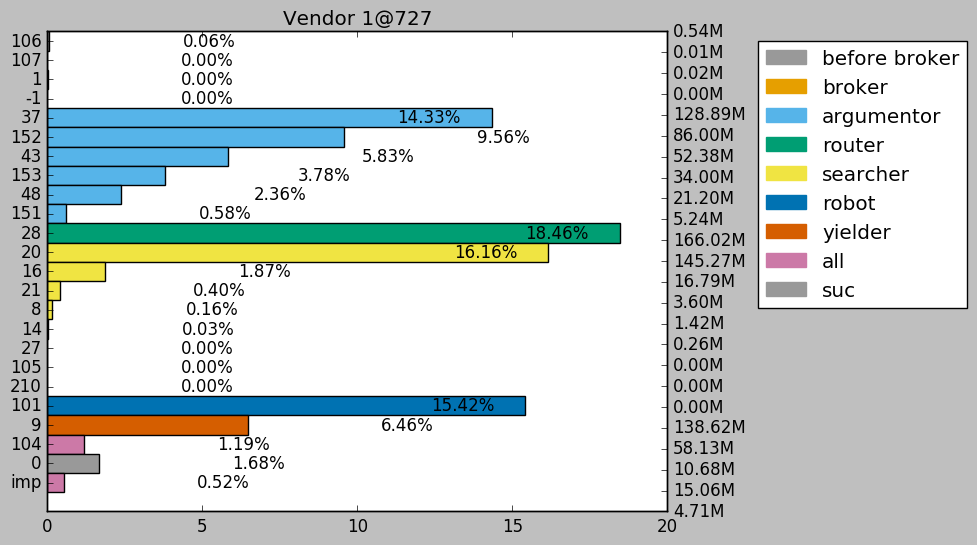

24 24


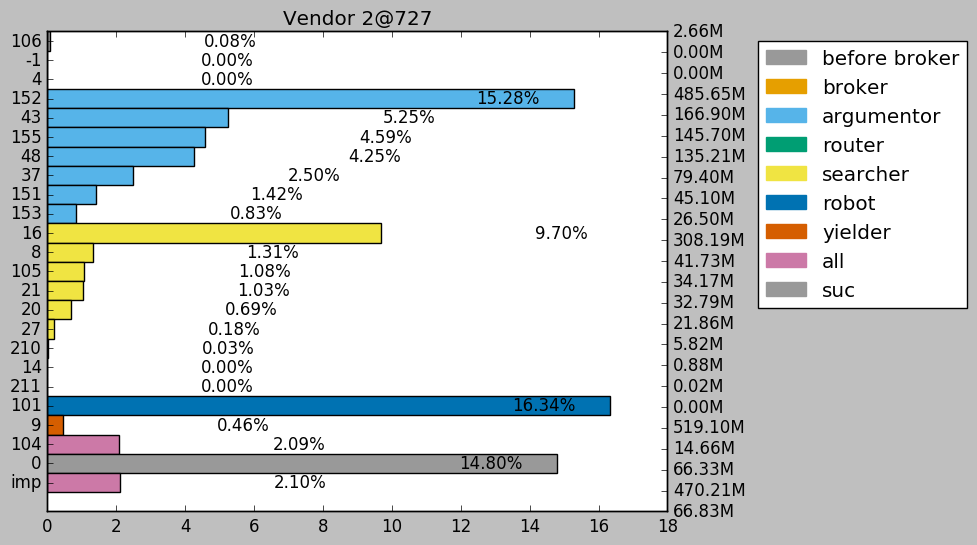

23 23


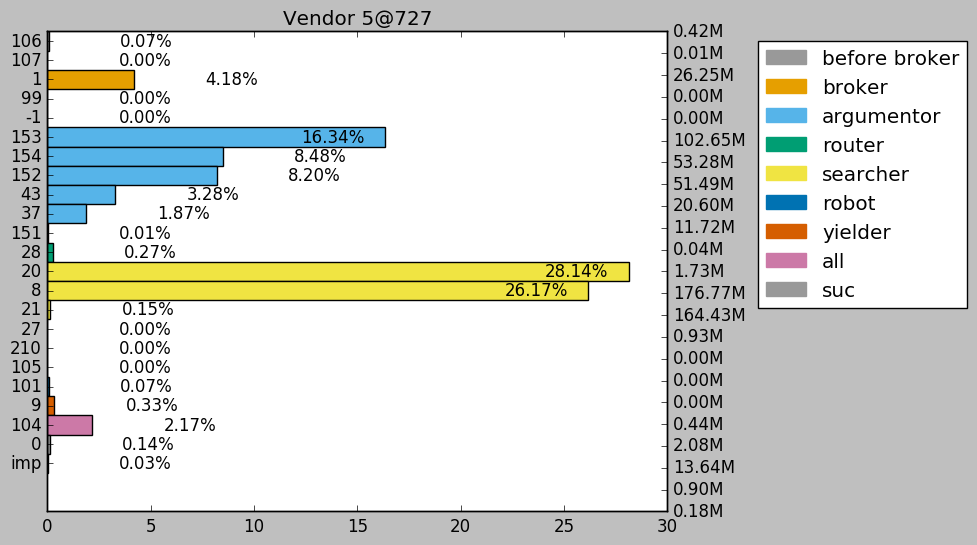

23 23


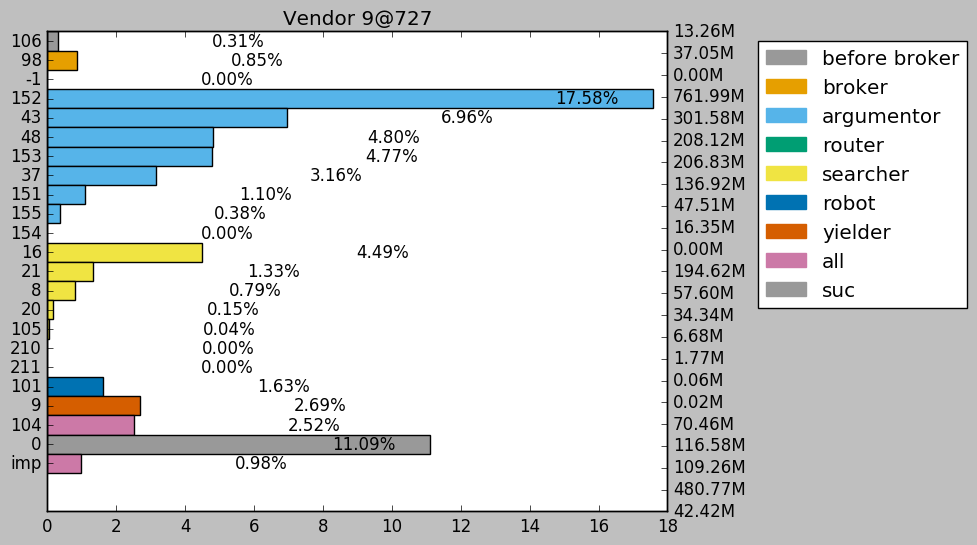

16 16


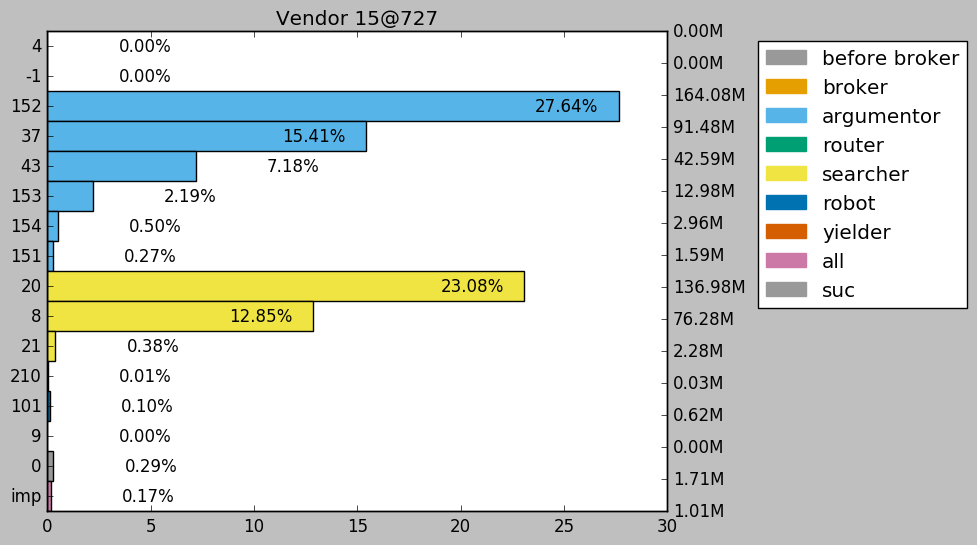

18 18


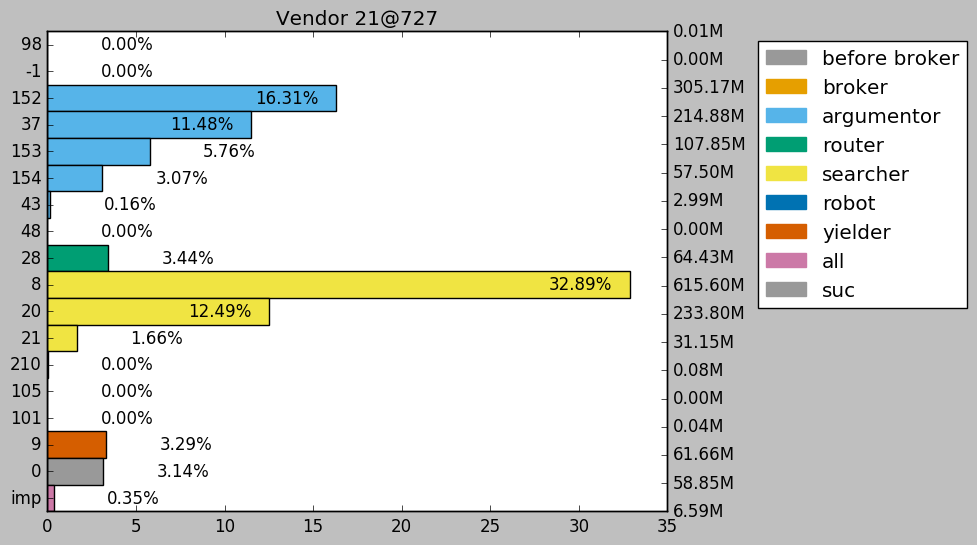

15 15


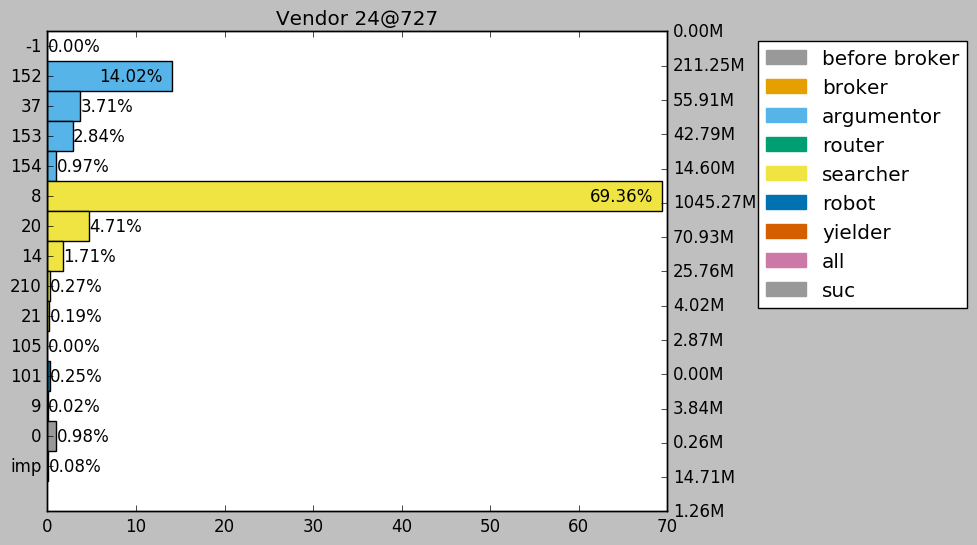

18 18


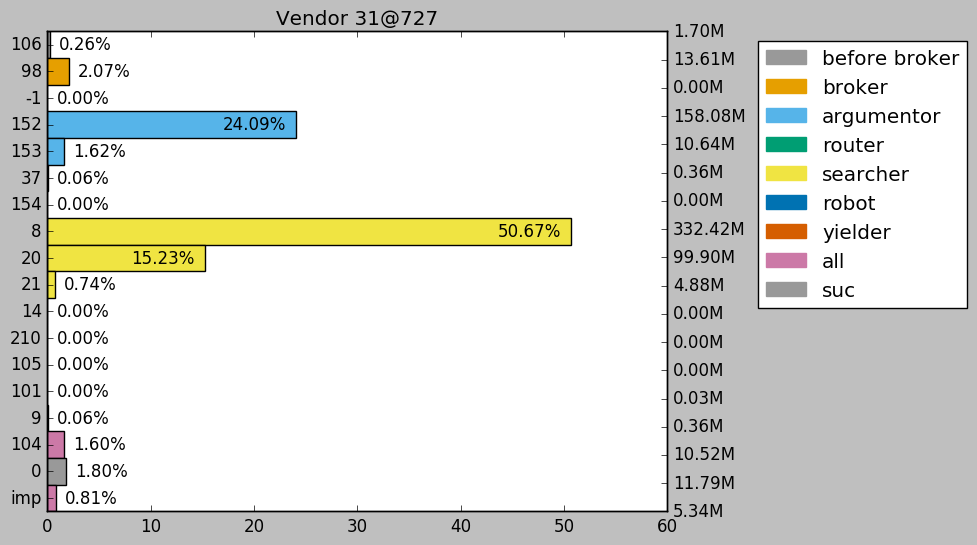

In [6]:
dt="727"
df=pd.read_table("./errdis"+dt,sep='\t',header=None,names=["vendor","err","pv"])
imp=pd.read_table("./imp"+dt,sep='\t',header=None,names=["vendor","imp"])
errcode=pd.read_csv('./errcode.csv',header=None)
errcode.dropna()
df['err']=df['err'].astype(str)
m=pd.merge(df,errcode,left_on='err',right_on=0)
pvbyv=m[['vendor','pv']].groupby(['vendor']).sum()
pvbyv['vendor']=pvbyv.index
res=pd.merge(m,pvbyv,left_on='vendor',right_on='vendor')
res['ratio']=res['pv_x']/res['pv_y']*100
# The palette with grey:
# cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# # The palette with black:
# cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
color_palette=["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
color_map={"argumentor":"#999999","router":"#E69F00","searcher":"#D35749","before broker":"#E47658",
           "all":"#F0936D","broker":"#F4A989","yielder":"#F8BFA5","robot":"#FCD6C1","suc":"#E7E0DB"}
phases=["before broker","broker","argumentor","router","searcher","robot","yielder","all","suc"]
color_map={}
for i in range(0,len(phases)):
    color_map[phases[i]]=color_palette[i%len(color_palette)]
patchs=[]
for i in phases:
    patchs.append(mpatches.Patch(color=color_map.get(i),label=i))
fontP = FontProperties()
fontP.set_size('small')

def autolabel(bars):
    # attach some text labels
    for bar in bars:
        width = bar.get_width()
        if width>10:
            ax.text(bar.get_x()+bar.get_width()-1, bar.get_y() + bar.get_height()/2,
                '%0.2f' % (float(width))+"%",
                ha='right',va='center')
        else:
            ax.text(bar.get_x()+bar.get_width()+6, bar.get_y() + bar.get_height()/2,
                '%0.2f' % (float(width))+"%",
                ha='right',va='center')
res['err']=res['err'].astype(int)

for v in [1,2,5,9,15,21,24,31]:
#     print v,"start---------------------------------------------"
    color_arr=[]
    all_res=pd.DataFrame()
    for i in phases:
        t=res[(res['vendor']==v)&(res[2]==i)][['err','ratio']].sort_values(['ratio','err'],ascending=False).reset_index()[["err","ratio"]]
        num=len(t.to_records())
        all_res=all_res.append(t)
        for j in range(0,num):
            color_arr.append(color_map.get(i))

#     print float(res[(res['vendor']==v)]['pv_y'].iloc[0])
    imp_v=float(imp[imp['vendor']==v]['imp'])/float(res[(res['vendor']==v)]['pv_y'].iloc[0])*100
#     print imp_v
    imp_v_df=pd.DataFrame(data=[imp_v])
    all_res=all_res.append(pd.DataFrame(data=[['imp',imp_v]], columns=['err','ratio']))
    all_res.index=all_res['err']
    a=all_res['ratio']
    
    y2label=[]
    for i in a.index:      
        if i=='imp':
            y2label.append( '%0.2f'%((imp[imp['vendor']==v]['imp'].iloc[0])/double(1000000))+"M")
        else:
            y2label.append('%0.2f'%(res[(res['vendor']==v)&(res['err']==i)]['pv_x'].iloc[0]/double(1000000))+"M")   

#     print imp_v_df
#     a=a.append(imp_v_df)
    color_arr.append('#CC79A7')
    print len(y2label),len(a.index)
    ind=np.arange(-1,0-a.shape[0]-1,-1)
    width=1
    fig,ax=plt.subplots()
    
    temp=ax.barh(ind,a,width,color=color_arr)
    ax.set_yticks(ind+0.5*width)
    ax.set_yticklabels(a.index)
    ax2=ax.twinx()
    ind2=np.arange(0,0-a.shape[0],-1)
    ax2.set_yticks(ind2+width)
    ax2.set_yticklabels(y2label)
    autolabel(temp)
    plt.legend(loc='upper right',handles=patchs,bbox_to_anchor=(1.5, 1),ncol=1)
    plt.title("Vendor "+str(v)+"@"+dt)
    plt.show()
    import os
    if not os.path.exists("./png/"+str(v)):
        os.makedirs("./png/"+str(v))
    fig.savefig("./png/"+str(v)+"/"+dt+".png")

In [3]:
df

,vendor,err,pv
0,64,37,1687849
1,0,5,11
2,33,0,215
3,33,1,43
4,33,8,2
5,61,152,88407772
6,61,153,2735253
7,1,-1,960
8,1,0,36252774
9,1,1,18030
